In [1]:
import matplotlib.pyplot as plt
import zarr

# Dataset zarr file

In [2]:
dataset = zarr.open("../data/demonstrations_snapshot_1.zarr", mode="r")

In [3]:
data = dataset["data"]
imgs = data["img"][:]
actions = data["action"][:]
episode_ends = dataset["episode_ends"][:]

Length of images: 9086
Action shape: (2,)
Length of actions: 9086
Image shape: (224, 224, 3)
Length of episode_ends: 54


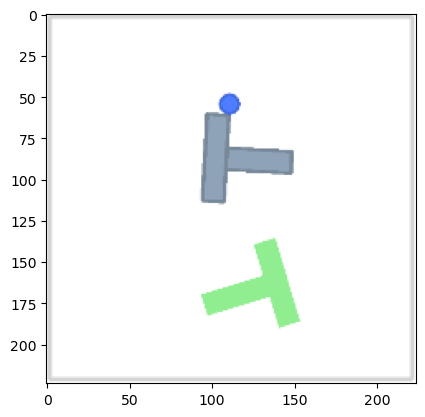

In [4]:
print(f"Length of images: {len(imgs)}")
print(f"Action shape: {actions[0].shape}")
print(f"Length of actions: {len(actions)}")
print(f"Image shape: {imgs[0].shape}")
print(f"Length of episode_ends: {len(episode_ends)}")

img = imgs[340]
plt.imshow(img/ 255)

# Detailed dataset understanding

#### Data

* **actions**
  `[1,3,5,2,1,7,9,4,3,2]`
* **images**
  `[img1,img2,img3,img4,img5,img6,img7,img8,img9,img10]`

#### Proper `episode_ends` array

The recording code appends **cumulative** episode lengths.
With three episodes of lengths

* episode1=4 steps
* episode2=4 steps
* episode3=2 steps

we get:

```python
episode_ends = [0, 4, 8, 10]
```

#### Split

| Episode | Slice in the array | actions     | images                 |
| ------- | ------------ | ----------- | ---------------------- |
| 1       | `0:4`        | `[1,3,5,2]` | `[img1,img2,img3,img4]` |
| 2       | `4:8`        | `[1,7,9,4]` | `[img5,img6,img7,img8]` |
| 3       | `8:10`       | `[3,2]`     | `[img9,img10]`         |


In [5]:
from robotics.model_src.dataset import generate_sample_dataset

images, actions, episode_ends = generate_sample_dataset(20)

In [6]:
actions

[1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4, 5, 6]

In [7]:
episode_ends

[0, 1, 14, 20]

In [8]:
from robotics.model_src.dataset import PushTDataset

dataset = PushTDataset("../data/demonstrations_snapshot_1.zarr", obs_horizon=4, prediction_horizon=8, image_size=None)

100%|██████████| 53/53 [00:00<00:00, 15385.02it/s]


In [9]:
item = dataset[0]

In [12]:
print(f"Observation images: {item["img_obs"].shape}")
print(f"Observation actions: {item["act_obs"].shape}")
print(f"Prediction actions: {item["act_pred"].shape}")

Observation images: (5, 224, 224, 3)
Observation actions: (5, 2)
Prediction actions: (8, 2)


# Data Loader